In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf

In [2]:
feature = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","target","junk"]

In [3]:
os.chdir("C:/Users/ArrunPersonal/Codes/Semester7/IDS/NSL-KDD")

In [4]:
df = pd.read_csv("KDDTrain+.csv", names = feature)
df.drop(["junk"],axis = 1,inplace = True)

In [5]:
df.isnull().values.any()

False

In [6]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [7]:
protocol_dict = dict(zip(set(df['protocol_type']),np.arange(len(set(df['protocol_type'])))))
service_dict = dict(zip(set(df['service']),np.arange(len(set(df['service'])))))
flag_dict = dict(zip(set(df['flag']),np.arange(len(set(df['flag'])))))

In [8]:
# changing attack labels to their respective attack class
def change_feature(df):
    df.target.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
    df.target.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)      
    df.target.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
    df.target.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)
    
    df.protocol_type.replace(protocol_dict.keys(),protocol_dict.values(),inplace=True)
    df.service.replace(service_dict.keys(),service_dict.values(),inplace=True)
    df.flag.replace(flag_dict.keys(),flag_dict.values(),inplace=True)

In [9]:
change_feature(df)

In [10]:
target_dict = dict(zip(set(df['target']),np.arange(len(set(df['target'])))))

In [11]:
def change_target(df):
    df.target.replace(target_dict.keys(),target_dict.values(),inplace=True)

In [12]:
change_target(df)

In [13]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,2,41,4,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,4
1,0,0,30,4,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,4
2,0,2,54,7,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,2
3,0,2,1,4,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,4
4,0,2,1,4,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4


In [14]:
df_lis = np.array(df.values.tolist())

In [15]:
from scipy.stats import pearsonr

In [16]:
features = np.array(df_lis[:,:-1])
labels = np.array(df_lis[:,-1])

In [17]:
scores = [abs(pearsonr(features[:,i],labels)[0]) for i in range(np.shape(features)[1])]

C:\Users\ArrunPersonal\anaconda3\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [18]:
scores[19] = 0
scores

[0.09879249098157113,
 0.0829110110721515,
 0.5643192775762153,
 0.46746815907449535,
 0.01035063735364418,
 0.00696944088250033,
 0.00488569278267694,
 0.07434092627500254,
 0.0007365994723351792,
 0.03260639773773422,
 0.01168207217448656,
 0.6444911029702094,
 0.009852352298868848,
 0.02353165942269988,
 0.02132947667387372,
 0.01097616123943684,
 0.020085866886687915,
 0.009592738754889325,
 0.03417455978123473,
 0,
 0.0025293292280558436,
 0.001562808029383379,
 0.48243517466329183,
 0.022454629578926452,
 0.5102107392755243,
 0.5075202303053715,
 0.2948864717371979,
 0.2956354371442021,
 0.6314716823001728,
 0.2571413079590464,
 0.044654609557857904,
 0.28124735413498475,
 0.6845725807514023,
 0.6153417066873347,
 0.3397790482934407,
 0.22932764918963175,
 0.17001036612630405,
 0.51113157487048,
 0.5140568288132344,
 0.2854887928613999,
 0.2957973200159718]

In [19]:
act_features = []
act_indices = []
for i in range(len(scores)):
    if(scores[i]> 0.1):
        act_indices.append(i)
        act_features.append(features[:,i])

In [20]:
act_features = np.array(act_features).T

In [21]:
for i in range(np.shape(act_features)[1]):
    if(np.std(act_features[:,i])!=0):
        act_features[:,i] = (act_features[:,i]-np.mean(act_features[:,i]))/np.std(act_features[:,i]) 
    else:
        act_features[:,i] = (act_features[:,i]-np.mean(act_features[:,i]))
np.shape(act_features)

(125973, 20)

In [22]:
np.shape(act_features),np.shape(labels)

((125973, 20), (125973,))

In [28]:
set(train_Y)

{0.0, 1.0, 2.0, 3.0, 4.0}

In [23]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(act_features,labels)

In [24]:
print(np.shape(train_X),np.shape(test_X),np.shape(train_Y),np.shape(test_Y))

(94479, 20) (31494, 20) (94479,) (31494,)


# Stacked Auto Encoder

### First Stack

In [25]:
from keras.layers import *
from keras.models import Model

In [26]:
batch_size = 32
input_dim = np.shape(train_X)[1]
input_layer = Input(shape=(input_dim), name='input')
#Input Layer
encoder = Dense (256, activation='relu')(input_layer)
#Encoder’s first dense layer
encoder = Dense (128, activation='relu')(encoder)
#Encoder’s second dense layer
encoder = Dense (64, activation='relu')(encoder)
# Code layer
latent_layer = Dense (32, activation='relu',name = 'latent_1')(encoder)
# Decoder’s first dense layer
decoder = Dense(64, activation='relu')(latent_layer)
# Decoder’s second dense layer
decoder = Dense(128, activation='relu')(decoder)
# Decoder’s Third dense layer
decoder = Dense(256, activation='relu')(decoder)
# Output Layer
decoder = Dense(input_dim, activation='relu')(decoder)

In [27]:
autoencoder_1 = Model(inputs=input_layer, outputs=decoder)
autoencoder_1.compile(metrics=['accuracy'],loss='mse',optimizer='adam')

In [28]:
autoencoder_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 20)]              0         
                                                                 
 dense (Dense)               (None, 256)               5376      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 latent_1 (Dense)            (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320  

In [29]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8,restore_best_weights=True)

In [30]:
stack_1 = autoencoder_1.fit(train_X, train_X, epochs=100, batch_size=batch_size,validation_data = (test_X,test_X),callbacks = [callback])

Epoch 1/100
2953/2953 [==============================] - 22s 7ms/step - loss: 0.3719 - accuracy: 0.6958 - val_loss: 0.3634 - val_accuracy: 0.9054
Epoch 2/100
2953/2953 [==============================] - 19s 6ms/step - loss: 0.3633 - accuracy: 0.7542 - val_loss: 0.3622 - val_accuracy: 0.9191
Epoch 3/100
2953/2953 [==============================] - 19s 6ms/step - loss: 0.3632 - accuracy: 0.7690 - val_loss: 0.3642 - val_accuracy: 0.6341
Epoch 4/100
2953/2953 [==============================] - 20s 7ms/step - loss: 0.3612 - accuracy: 0.7878 - val_loss: 0.3603 - val_accuracy: 0.5333
Epoch 5/100
2953/2953 [==============================] - 19s 6ms/step - loss: 0.3601 - accuracy: 0.8077 - val_loss: 0.3596 - val_accuracy: 0.7798
Epoch 6/100
2953/2953 [==============================] - 19s 6ms/step - loss: 0.3600 - accuracy: 0.8110 - val_loss: 0.3596 - val_accuracy: 0.9208
Epoch 7/100
2953/2953 [==============================] - 19s 6ms/step - loss: 0.3598 - accuracy: 0.8223 - val_loss: 0.3591 -

In [31]:
pred = autoencoder_1.predict(act_features)

3937/3937 [==============================] - 7s 2ms/step


In [32]:
from sklearn.metrics import *
import keras

In [33]:
np.sum(keras.losses.mean_squared_error(pred,act_features))/len(act_features)

0.35873806454341733

In [34]:
layer_name = 'latent_1'
intermediate_layer_model = Model(inputs=autoencoder_1.input,
                                 outputs=autoencoder_1.get_layer(layer_name).output)
intermediate_output_1 = intermediate_layer_model.predict(act_features)

3937/3937 [==============================] - 5s 1ms/step


### Second Stack

In [35]:
batch_size = 32
input_dim = np.shape(intermediate_output_1)[1]
input_layer = Input(shape=(input_dim), name='input')
#Input Layer
encoder = Dense (128, activation='relu')(input_layer)
#Encoder’s first dense layer
encoder = Dense (64, activation='relu')(encoder)
#Encoder’s second dense layer
encoder = Dense (32, activation='relu')(encoder)
# Code layer
latent_layer = Dense (16, activation='relu',name = 'latent_2')(encoder)
# Decoder’s first dense layer
decoder = Dense(32, activation='relu')(latent_layer)
# Decoder’s second dense layer
decoder = Dense(64, activation='relu')(decoder)
# Decoder’s Third dense layer
decoder = Dense(128, activation='relu')(decoder)
# Output Layer
decoder = Dense(input_dim, activation='relu')(decoder)

In [36]:
autoencoder_2 = Model(inputs=input_layer, outputs=decoder)
autoencoder_2.compile(metrics=['accuracy'],loss='mse',optimizer='adam')

In [37]:
autoencoder_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 32)]              0         
                                                                 
 dense_7 (Dense)             (None, 128)               4224      
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 latent_2 (Dense)            (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 32)                544       
                                                                 
 dense_11 (Dense)            (None, 64)                2112

In [38]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8,restore_best_weights=True)

In [39]:
train_intX,test_intX,train_intY,test_intY = train_test_split(intermediate_output_1,labels)

In [40]:
stack_2 = autoencoder_2.fit(train_intX, train_intX, epochs=100, batch_size=32,callbacks = [callback],validation_data = (test_intX, test_intX))

Epoch 1/100
2953/2953 [==============================] - 19s 6ms/step - loss: 0.0293 - accuracy: 0.8107 - val_loss: 0.0084 - val_accuracy: 0.9100
Epoch 2/100
2953/2953 [==============================] - 12s 4ms/step - loss: 0.0067 - accuracy: 0.9315 - val_loss: 0.0060 - val_accuracy: 0.9399
Epoch 3/100
2953/2953 [==============================] - 10s 3ms/step - loss: 0.0048 - accuracy: 0.9404 - val_loss: 0.0068 - val_accuracy: 0.9325
Epoch 4/100
2953/2953 [==============================] - 10s 3ms/step - loss: 0.0040 - accuracy: 0.9471 - val_loss: 0.0042 - val_accuracy: 0.9450
Epoch 5/100
2953/2953 [==============================] - 10s 3ms/step - loss: 0.0035 - accuracy: 0.9515 - val_loss: 0.0036 - val_accuracy: 0.9613
Epoch 6/100
2953/2953 [==============================] - 9s 3ms/step - loss: 0.0033 - accuracy: 0.9552 - val_loss: 0.0027 - val_accuracy: 0.9627
Epoch 7/100
2953/2953 [==============================] - 10s 3ms/step - loss: 0.0030 - accuracy: 0.9587 - val_loss: 0.0032 - 

In [41]:
pred = autoencoder_2.predict(intermediate_output_1)

3937/3937 [==============================] - 4s 912us/step


In [42]:
np.sum(keras.losses.mean_squared_error(pred,intermediate_output_1))/len(intermediate_output_1)

0.0020124132560740944

In [55]:
layer_name = 'latent_2'
intermediate_layer_model = Model(inputs=autoencoder_2.input,
                                 outputs=autoencoder_2.get_layer(layer_name).output)
intermediate_output_2 = intermediate_layer_model.predict(intermediate_output_1)

3937/3937 [==============================] - 7s 2ms/step


### Classifier Model

In [56]:
batch_size = 32
input_dim = np.shape(intermediate_output_2)[1]
input_layer = Input(shape=(input_dim), name='input')
#Input Layer
dense1 = Dense (128, activation='relu')(input_layer)
dense2 = Dense (64, activation='relu')(dense1)
dense3 = Dense (8, activation='relu')(dense2)
# Output Layer
classifier = Dense(len(set(train_Y)), activation='softmax')(dense3)

In [57]:
classify = Model(inputs=input_layer, outputs=classifier)
classify.compile(metrics=['accuracy'],loss='sparse_categorical_crossentropy',optimizer='adam')

In [58]:
classify.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 16)]              0         
                                                                 
 dense_18 (Dense)            (None, 128)               2176      
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 8)                 520       
                                                                 
 dense_21 (Dense)            (None, 5)                 45        
                                                                 
Total params: 10,997
Trainable params: 10,997
Non-trainable params: 0
_________________________________________________________________


In [59]:
train_intX, test_intX , train_intY ,test_intY = train_test_split(intermediate_output_2,labels,random_state = 42,test_size = 0.1)

In [60]:
np.shape(train_intX), np.shape(test_intX ), np.shape(train_intY) ,np.shape(test_intY)

((113375, 16), (12598, 16), (113375,), (12598,))

In [61]:
history = classify.fit(train_intX, train_intY, epochs=100, batch_size=32,callbacks = [callback],validation_data = (test_intX, test_intY))

Epoch 1/100
3543/3543 [==============================] - 19s 5ms/step - loss: 0.1389 - accuracy: 0.9589 - val_loss: 0.0886 - val_accuracy: 0.9713
Epoch 2/100
3543/3543 [==============================] - 19s 5ms/step - loss: 0.0768 - accuracy: 0.9755 - val_loss: 0.0782 - val_accuracy: 0.9744
Epoch 3/100
3543/3543 [==============================] - 19s 5ms/step - loss: 0.0639 - accuracy: 0.9788 - val_loss: 0.0648 - val_accuracy: 0.9794
Epoch 4/100
3543/3543 [==============================] - 19s 5ms/step - loss: 0.0573 - accuracy: 0.9808 - val_loss: 0.0608 - val_accuracy: 0.9806
Epoch 5/100
3543/3543 [==============================] - 19s 5ms/step - loss: 0.0524 - accuracy: 0.9819 - val_loss: 0.0611 - val_accuracy: 0.9811
Epoch 6/100
3543/3543 [==============================] - 19s 5ms/step - loss: 0.0499 - accuracy: 0.9823 - val_loss: 0.0613 - val_accuracy: 0.9817
Epoch 7/100
3543/3543 [==============================] - 19s 5ms/step - loss: 0.0471 - accuracy: 0.9833 - val_loss: 0.0516 -

In [62]:
preds = classify.predict(test_intX)

394/394 [==============================] - 1s 2ms/step


In [63]:
np.shape(preds),np.shape(test_intY)

((12598, 5), (12598,))

In [64]:
set(labels)

{0.0, 1.0, 2.0, 3.0, 4.0}

In [65]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(np.argmax(preds,axis = 1), test_intY)

In [66]:
print(accuracy_score(np.argmax(preds,axis = 1),test_intY))
print(precision_score(np.argmax(preds,axis = 1),test_intY,average = 'macro'))
print(recall_score(np.argmax(preds,axis = 1),test_intY,average = 'macro'))
print(f1_score(np.argmax(preds,axis = 1),test_intY,average = 'macro'))

0.9901571678044134
0.7558181113989388
0.7692888017531805
0.7622682575519264


C:\Users\ArrunPersonal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
import seaborn as sns

<AxesSubplot:>

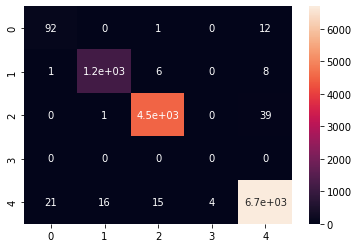

In [68]:
sns.heatmap(conf_mat, annot=True)